<a href="https://colab.research.google.com/github/samirgadkari/DS-Sprint-01-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [0]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [0]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [0]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  45088      0 --:--:-- --:--:-- --:--:-- 44955
    194     194   15240


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)


In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [0]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar "clean" source.

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [30]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.names

1. Title: Large Soybean Database

2. Sources:
     (a) R.S. Michalski and R.L. Chilausky "Learning by Being Told and
         Learning from Examples: An Experimental Comparison of the Two
	 Methods of Knowledge Acquisition in the Context of Developing
	 an Expert System for Soybean Disease Diagnosis", International
	 Journal of Policy Analysis and Information Systems, Vol. 4,
	 No. 2, 1980.
     (b) Donor: Ming Tan & Jeff Schlimmer (Jeff.Schlimmer%cs.cmu.edu)
     (c) Date: 11 July 1988

3. Past Usage:
      1. See above.
      2. Tan, M., & Eshelman, L. (1988). Using weighted networks to represent
         classification knowledge in noisy domains.  Proceedings of the Fifth
         International Conference on Machine Learning (pp. 121-134). Ann Arbor,
         Michigan: Morgan Kaufmann.
         -- IWN recorded a 97.1% classification accuracy 
            -- 290 training and 340 test instances
      3. Fisher,D.H. & Schlimmer,J.C. (1988). Concept Simplification and
         Predictiv

In [31]:
# Use attribute information to get class names
soy_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.data'
soy = pd.read_csv(soy_data_url, header = None)

columns = [ 'class-name','date','plant-stand','precip','temp','hail','crop-hist','area-damaged','severity','seed-tmt',
            'germination','plant-growth','leaves','leafspots-halo','leafspots-marg','leafspot-size','leaf-shread',
            'leaf-malf','leaf-mild','stem','lodging','stem-cankers','canker-lesion','fruiting-bodies','external decay',
            'mycelium','int-discolor','sclerotia','fruit-pods','fruit spots','seed','mold-growth','seed-discolor',
            'seed-size','shriveling','roots' ]
soy.columns = columns
print(soy.head())
print(soy.shape)
soy.isna().sum()

              class-name date plant-stand precip temp hail crop-hist  \
0  diaporthe-stem-canker    6           0      2    1    0         1   
1  diaporthe-stem-canker    4           0      2    1    0         2   
2  diaporthe-stem-canker    3           0      2    1    0         1   
3  diaporthe-stem-canker    3           0      2    1    0         1   
4  diaporthe-stem-canker    6           0      2    1    0         2   

  area-damaged severity seed-tmt  ...  int-discolor sclerotia  fruit-pods  \
0            1        1        0  ...             0         0           0   
1            0        2        1  ...             0         0           0   
2            0        2        1  ...             0         0           0   
3            0        2        0  ...             0         0           0   
4            0        1        0  ...             0         0           0   

  fruit spots seed mold-growth seed-discolor seed-size shriveling roots  
0           4    0           0

class-name         0
date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
dtype: int64

In [32]:
# From looking at the data, we see that NA values are coded as '?'.
# Replace these values with NaN
soy_with_nas = soy.replace('?', np.nan)
soy_with_nas.isna().sum()

class-name          0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64

In [36]:
# To see more rows when you print dataframes
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print(soy_with_nas.head(400))
soy_with_nas.dtypes

                      class-name date plant-stand precip temp hail crop-hist area-damaged severity seed-tmt germination plant-growth  leaves leafspots-halo leafspots-marg leafspot-size leaf-shread leaf-malf leaf-mild stem lodging stem-cankers canker-lesion fruiting-bodies external decay mycelium int-discolor sclerotia fruit-pods fruit spots seed mold-growth seed-discolor seed-size shriveling roots
0          diaporthe-stem-canker    6           0      2    1    0         1            1        1        0           0            1       1              0              2             2           0         0         0    1       1            3             1               1              1        0            0         0          0           4    0           0             0         0          0     0
1          diaporthe-stem-canker    4           0      2    1    0         2            0        2        1           1            1       1              0              2             2           0  

class-name         object
date               object
plant-stand        object
precip             object
temp               object
hail               object
crop-hist          object
area-damaged       object
severity           object
seed-tmt           object
germination        object
plant-growth       object
leaves              int64
leafspots-halo     object
leafspots-marg     object
leafspot-size      object
leaf-shread        object
leaf-malf          object
leaf-mild          object
stem               object
lodging            object
stem-cankers       object
canker-lesion      object
fruiting-bodies    object
external decay     object
mycelium           object
int-discolor       object
sclerotia          object
fruit-pods         object
fruit spots        object
seed               object
mold-growth        object
seed-discolor      object
seed-size          object
shriveling         object
roots              object
dtype: object

Values unique in leaves column: [1 0]


0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
277    1
278    1
279    1
280    1
281    1
282    1
283    1
284    1
285    1
286    1
287    1
288    1
289    1
290    0
291    0
292    0
293    0
294    0
295    0
296    1
297    1
298    1
299    1
300    1
301    1
302    1
303    1
304    1
305    1
306    1
Name: leaves, Length: 307, dtype: int64

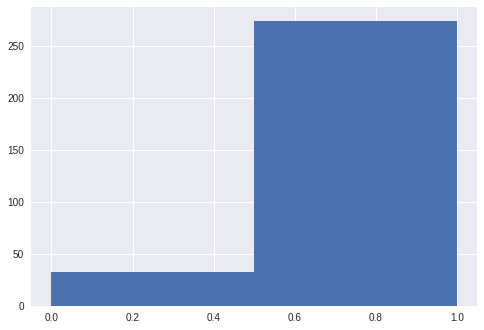

In [27]:
# Looks like everything here is an object (categorical), except for leaves which is a number.
# Let's look at the data of leaves to see if it is lopsided.
# If it's lopsided, we can use median to replace missing values, if not, we can use mean.
print('Values unique in leaves column:', soy_with_nas.leaves.unique()) # Print all unique values of a column
plt.hist(soy_with_nas.leaves, 2)
soy_with_nas.leaves

# Since there are only two unqiue values in leaves, that column is categorical as well.

In [40]:
# Maximum missing values are 41 out of 307 rows (13%).
# We will replace all values with the median value for each column.
soy_temp = soy_with_nas.copy()
print('Shape of dataframe before dropping rows:', soy_temp.shape)
soy_after_dropna_rows = soy_temp.dropna()
print('Shape of dataframe after dropping rows:', soy_after_dropna_rows.shape)

soy_temp = soy_with_nas.copy()
print('Shape of dataframe before dropping cols:', soy_temp.shape)
soy_after_dropna_cols = soy_temp.dropna(axis = 1)
print('Shape of dataframe after dropping cols:', soy_after_dropna_cols.shape)

# So we only have 2 columns left after dropping columns - won't work !!
# With rows, we still lost 13% of rows.

Shape of dataframe before dropping rows: (307, 36)
Shape of dataframe after dropping rows: (266, 36)
Shape of dataframe before dropping cols: (307, 36)
Shape of dataframe after dropping cols: (307, 2)


In [49]:
# Let's replace missing values with the median of each column.
def replace_missing(df):
  df_copy = df.copy()
  for col in df.columns.values:
    df_copy[col].fillna(df[col].mode()[0], inplace = True)
  return df_copy

soy_after_replacement = replace_missing(soy_with_nas)
print('Number of NAs after replacement:', soy_after_replacement.isna().sum().sum())
print(soy_after_replacement.head(400))

Number of NAs after replacement: 0
                      class-name date plant-stand precip temp hail crop-hist area-damaged severity seed-tmt germination plant-growth  leaves leafspots-halo leafspots-marg leafspot-size leaf-shread leaf-malf leaf-mild stem lodging stem-cankers canker-lesion fruiting-bodies external decay mycelium int-discolor sclerotia fruit-pods fruit spots seed mold-growth seed-discolor seed-size shriveling roots
0          diaporthe-stem-canker    6           0      2    1    0         1            1        1        0           0            1       1              0              2             2           0         0         0    1       1            3             1               1              1        0            0         0          0           4    0           0             0         0          0     0
1          diaporthe-stem-canker    4           0      2    1    0         2            0        2        1           1            1       1              0        

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. I suggset image, text, or (public) API - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [51]:
!pip install --upgrade google-cloud-language

    100% |████████████████████████████████| 71kB 2.5MB/s 
  Found existing installation: google-cloud-language 1.0.2
    Uninstalling google-cloud-language-1.0.2:
      Successfully uninstalled google-cloud-language-1.0.2


In [52]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

# Instantiates a client
client = language.LanguageServiceClient()

# The text to analyze
text = u'Hello, world!'
document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(document=document).document_sentiment

print('Text: {}'.format(text))
print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))

DefaultCredentialsError: ignored